<a href="https://colab.research.google.com/github/NijilGeorge/AML_Assignment2/blob/main/AML_Assignment2_BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [4]:
tokenizer = Tokenizer()
from google.colab import drive
drive.mount('/content/drive')
import os
# input_dir="/content/drive/My Drive/deep_learning_assignment/training/data/"
data = open('/content/drive/My Drive/Assignment2/Gutenberg_EBook.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

Mounted at /content/drive


In [5]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [6]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [7]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
#use if pretrained embeddings are used
embedding_dictionary=dict()
glove_file=open("/content/drive/My Drive/AML_Assignment2/glove.6B.100d.txt");
for line in glove_file:
  records=line.split()
  # print(records)
  word=records[0]
  vector=np.array(records[1:],dtype="float32")
  embedding_dictionary[word]=vector
glove_file.close()

In [ ]:
#use if pretrained embeddings are used
embedding_matrix=np.zeros((vocal_size,100))
for word,index in tokenizer.word_index.items():
  embedding_vector =embedding_dictionary.get(word)
  if embedding_vector is not None :
    embedding_matrix[index]=embedding_vector

In [21]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.load_weights('/content/drive/My Drive/Assignment2/saved_model/')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 16, 100)           305500    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 16, 300)           301200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 300)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 1527)              154227    
_________________________________________________________________
dense_5 (Dense)              (None, 3055)              4668040   
Total params: 5,589,367
Trainable params: 5,589,367
Non-trainable params: 0
____________________________________________

In [22]:
history = model.fit(predictors, label, epochs=30, verbose=1)

Epoch 1/30
720/720 [==============================] - 23s 32ms/step - loss: 1.5328 - accuracy: 0.6977
Epoch 2/30
720/720 [==============================] - 23s 32ms/step - loss: 1.5314 - accuracy: 0.6978
Epoch 3/30
720/720 [==============================] - 23s 32ms/step - loss: 1.5030 - accuracy: 0.7059
Epoch 4/30
720/720 [==============================] - 23s 32ms/step - loss: 1.5067 - accuracy: 0.7042
Epoch 5/30
720/720 [==============================] - 23s 32ms/step - loss: 1.4981 - accuracy: 0.7064
Epoch 6/30
720/720 [==============================] - 23s 32ms/step - loss: 1.4846 - accuracy: 0.7073
Epoch 7/30
720/720 [==============================] - 23s 32ms/step - loss: 1.4629 - accuracy: 0.7155
Epoch 8/30
720/720 [==============================] - 23s 32ms/step - loss: 1.4578 - accuracy: 0.7126
Epoch 9/30
720/720 [==============================] - 23s 32ms/step - loss: 1.4611 - accuracy: 0.7132
Epoch 10/30
720/720 [==============================] - 23s 32ms/step - loss: 1.438

In [23]:
model.save_weights('/content/drive/My Drive/Assignment2/saved_model/')

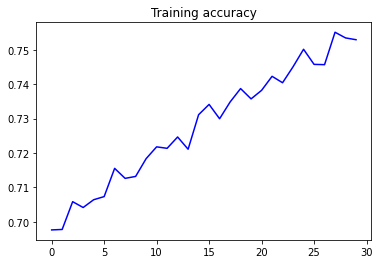

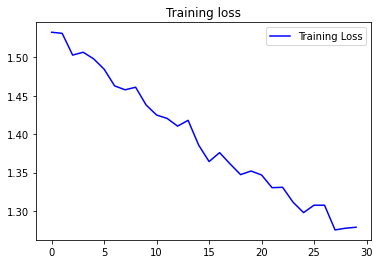

In [24]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [25]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

In [26]:
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope i've got into the habit of putting things into this b agreement violates the chief clerk michael room along with the project gutenberg clerk's firm where set posted on that there were on his sister's below suggested the chief clerk called it would climb up to the door and look was ill the window left everyone out to be last night at the dirt were the foundation immediately following the table at all look at the table with her arms describing on the front door and is committed to provide volunteers to the full room playing they were standing up
